## Heart Disease Prediction

## Life Cycle of Machine Learning

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratoy Data Analysis
- Data Pre-processing
- Model Training
- Choose the best Model

### 1) Problem Statement
-This project seeks to understand how the risk of heart disease is affected by various factors such as Gender, Age, Education Level, Smoking Status, Cigarettes Consumed Per Day, Blood Pressure Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes, Total Cholesterol, Systolic Blood Pressure, Diastolic Blood Pressure, Body Mass Index (BMI), Heart Rate, and Glucose Levels.
### 2) The Project goal
- The goal is to analyze the impact of these factors on the likelihood of heart disease and make predictions based on the provided features
### 3) Data Source
- Dataset source - https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
- This data consists of 16 columns and 4240 rows

### 3.1 Import Data and Required Packages

In [1025]:
#Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset as pandas Dataframe

In [1026]:
df=pd.read_csv("framingham.csv")

#### show the top 5 records from the dataset

In [1027]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### shape of the dataset

In [1028]:
df.shape

(4240, 16)

### 4) Data Checks to perform
- Normalizing the columns names
- Check missing values
- Check Duplicates
- Check data types
- Check number of unique values in each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 4.1) Normalizing the columns names

In [1029]:
df.columns=df.columns.str.lower()
df.columns

Index(['male', 'age', 'education', 'currentsmoker', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

### 4.2) displaying the ranges of feature values

In [1030]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

male
[1 0]
2
age
[39 46 48 61 43]
39
education
[ 4.  2.  1.  3. nan]
4
currentsmoker
[0 1]
2
cigsperday
[ 0. 20. 30. 23. 15.]
33
bpmeds
[ 0.  1. nan]
2
prevalentstroke
[0 1]
2
prevalenthyp
[0 1]
2
diabetes
[0 1]
2
totchol
[195. 250. 245. 225. 285.]
248
sysbp
[106.  121.  127.5 150.  130. ]
234
diabp
[70. 81. 80. 95. 84.]
146
bmi
[26.97 28.73 25.34 28.58 23.1 ]
1364
heartrate
[80. 95. 75. 65. 85.]
73
glucose
[ 77.  76.  70. 103.  85.]
143
tenyearchd
[0 1]
2


### 4.2) Mapping the numerical values into Categorical for easy understanding of the dataset information

In [1031]:
male_values = {0: 'no', 1: 'yes'}
df['male'] = df['male'].map(male_values)

currentsmoker_values = {0: 'non_smoker', 1: 'smoker'}
df['currentsmoker'] = df['currentsmoker'].map(currentsmoker_values)

stroke_values = {0: 'no_stroke', 1: 'stroke'}
df['prevalentstroke'] = df['prevalentstroke'].map(stroke_values)

hype_values = {0: 'no_hypertension', 1: 'hypertension'}
df['prevalenthyp'] = df['prevalenthyp'].map(hype_values)

diabetes_values = {0: 'no_diabetes', 1: 'diabetes'}
df['diabetes'] = df['diabetes'].map(diabetes_values)
bpmeds_values = {0: 'no bp meds', 1: 'bp meds'}
df['bpmeds']=df['bpmeds'].map(bpmeds_values)


In [1032]:
df.head(2)


,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,yes,39,4.0,non_smoker,0.0,no bp meds,no_stroke,no_hypertension,no_diabetes,195.0,106.0,70.0,26.97,80.0,77.0,0
1,no,46,2.0,non_smoker,0.0,no bp meds,no_stroke,no_hypertension,no_diabetes,250.0,121.0,81.0,28.73,95.0,76.0,0


### 4.3) Checking the dtypes

In [1033]:
df.dtypes

male                object
age                  int64
education          float64
currentsmoker       object
cigsperday         float64
bpmeds              object
prevalentstroke     object
prevalenthyp        object
diabetes            object
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
tenyearchd           int64
dtype: object

### 4.4) Checking the duplicates

In [1034]:
df.duplicated().sum()

0

## 4.5 ) Checking the Outliers

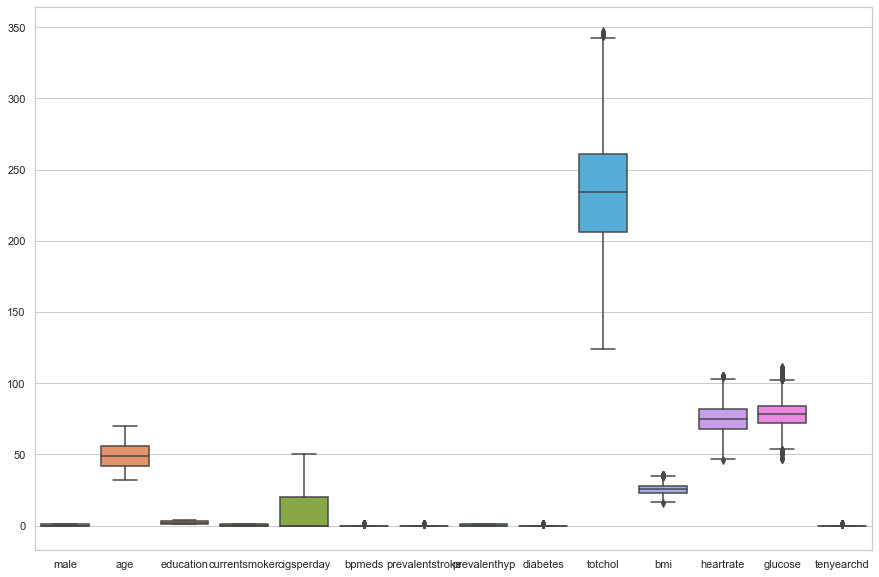

In [1079]:
plt.figure(figsize=(15,10),facecolor='w')
sns.boxplot(data=df)
plt.show()

In [1036]:
def out_iqr(df, columns):
    q25, q75 = df[columns].quantile([0.25,0.75])
    irq = q75 - q25
    lower, upper = q25 - 1.5 * irq, q75 + 1.5 * irq
    
    print(f"The IQR is {irq:.2f}")
    print(f"The lower bound is {lower:.2f}")
    print(f"The upper bound is {upper:.2f}")
    
    outliers = df[(df[columns] < lower) | (df[columns] > upper)]
    print(f"Total number of outliers: {outliers.shape[0]}")
    
    
columns = ['age','cigsperday', 'totchol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']
for column in columns:
    print(column)
    out_iqr(df, column)  
    print()  

age
The IQR is 14.00
The lower bound is 21.00
The upper bound is 77.00
Total number of outliers: 0

cigsperday
The IQR is 20.00
The lower bound is -30.00
The upper bound is 50.00
Total number of outliers: 12

totchol
The IQR is 57.00
The lower bound is 120.50
The upper bound is 348.50
Total number of outliers: 56

sysbp
The IQR is 27.00
The lower bound is 76.50
The upper bound is 184.50
Total number of outliers: 126

diabp
The IQR is 15.00
The lower bound is 52.50
The upper bound is 112.50
Total number of outliers: 77

bmi
The IQR is 4.97
The lower bound is 15.62
The upper bound is 35.49
Total number of outliers: 97

heartrate
The IQR is 15.00
The lower bound is 45.50
The upper bound is 105.50
Total number of outliers: 76

glucose
The IQR is 16.00
The lower bound is 47.00
The upper bound is 111.00
Total number of outliers: 188



#### We dont have much outliers in the dataset so we may opt to treat them instead of deleting  them

### 4.5.1) Imputing Outliers:

In [1037]:
def impute_outlier(df,columns):
    q1,q3=df[columns].quantile([0.25,0.75])
    iqr=q3-q1
    lower_tail,upper_tail=q1-1.5*iqr,q3+1.5*iqr
    median=df[columns].median()
    
    df[columns] = df[columns].apply(lambda x: median if x < lower_tail or x > upper_tail else x)
    print(f'Outliers in {columns} have being replaced with the median')
    
columns = ['age','cigsperday', 'totchol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']
for column in columns:
    impute_outlier(df,column)    
    

Outliers in age have being replaced with the median
Outliers in cigsperday have being replaced with the median
Outliers in totchol have being replaced with the median
Outliers in sysbp have being replaced with the median
Outliers in diabp have being replaced with the median
Outliers in bmi have being replaced with the median
Outliers in heartrate have being replaced with the median
Outliers in glucose have being replaced with the median


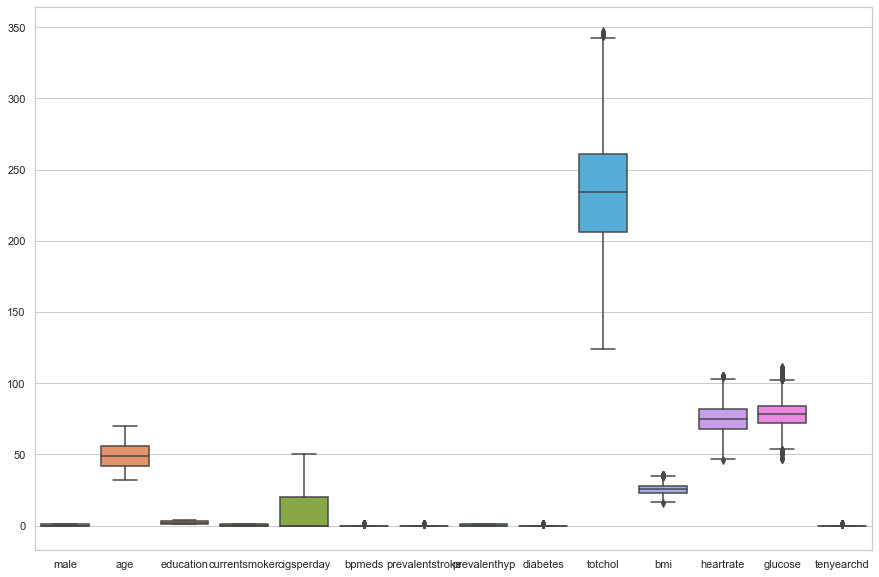

In [1080]:
# check to confirm if outliers have being removed
plt.figure(figsize=(15,10),facecolor='w')
sns.boxplot(data=df)
plt.show()

### 4.6 ) Checking the missing values

In [1039]:
df.isna().sum()

male                 0
age                  0
education          105
currentsmoker        0
cigsperday          29
bpmeds              53
prevalentstroke      0
prevalenthyp         0
diabetes             0
totchol             50
sysbp                0
diabp                0
bmi                 19
heartrate            1
glucose            388
tenyearchd           0
dtype: int64

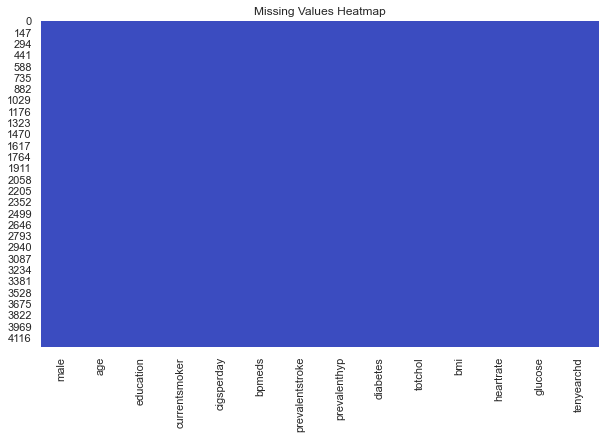

In [1082]:
# Visualizing missing
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), annot=False, cmap='coolwarm', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

#### There are missing values in the dataset

### 4.6.1) Filling the mising values

In [1041]:
## filling missing values
from sklearn.impute import SimpleImputer
numeric_col=['cigsperday','totchol','bmi','heartrate','glucose']
categorical_col=['education','bpmeds']
mean_imputer=SimpleImputer(strategy='mean')
df[numeric_col]=mean_imputer.fit_transform(df[numeric_col])

mode_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_col]=mode_imputer.fit_transform(df[categorical_col])


### 4.7) checking the information of the dataset

In [1042]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentsmoker    4240 non-null   object 
 4   cigsperday       4240 non-null   float64
 5   bpmeds           4240 non-null   object 
 6   prevalentstroke  4240 non-null   object 
 7   prevalenthyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totchol          4240 non-null   float64
 10  sysbp            4240 non-null   float64
 11  diabp            4240 non-null   float64
 12  bmi              4240 non-null   float64
 13  heartrate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  tenyearchd       4240 non-null   int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 530.1+ KB


### 4.8) Checking the stats of the dataset

In [1043]:
df.describe()

,age,education,cigsperday,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,1.955189,8.832581,234.859666,130.236675,82.259906,25.488910,75.246520,78.464694,0.151887
std,8.572942,1.018522,11.564898,40.342762,18.481708,10.664251,3.481798,10.906164,10.241852,0.358953
min,32.000000,1.000000,0.000000,124.000000,83.500000,53.000000,15.960000,46.000000,47.000000,0.000000
25%,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,261.000000,141.000000,89.000000,27.770000,82.000000,84.000000,0.000000
max,70.000000,4.000000,50.000000,347.000000,184.500000,112.500000,35.450000,105.000000,111.000000,1.000000


## 5) Exploratory Analysis

### 5.1) Target Variable analysis

In [1044]:
df.tenyearchd.value_counts(normalize=True)*100

0    84.811321
1    15.188679
Name: tenyearchd, dtype: float64

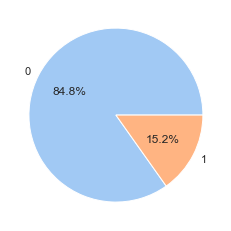

In [1045]:
color=sns.color_palette('pastel')[0:5]
data=df['tenyearchd'].value_counts()
label=data.index
plt.pie(data,labels=label,colors=color,autopct="%1.1f%%")
plt.show()

#####  Conclusion: The distribution of target variable is highly imbalanced.This will lead problem in fitting of models.Therefore this problem should be handled.

### 5.2) Univarite Analysis

- Categorical variables

In [1046]:
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']
for feature in categorical_columns:
    print(feature)
    print(df[feature].value_counts())
    print()

male
no     2420
yes    1820
Name: male, dtype: int64

currentsmoker
non_smoker    2145
smoker        2095
Name: currentsmoker, dtype: int64

bpmeds
no bp meds    4116
bp meds        124
Name: bpmeds, dtype: int64

prevalentstroke
no_stroke    4215
stroke         25
Name: prevalentstroke, dtype: int64

prevalenthyp
no_hypertension    2923
hypertension       1317
Name: prevalenthyp, dtype: int64

diabetes
no_diabetes    4131
diabetes        109
Name: diabetes, dtype: int64



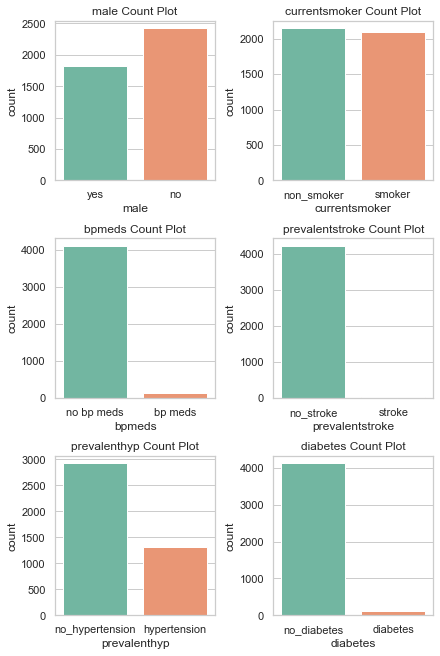

In [1047]:
num_plots=len(categorical_columns)
total_columns=2
total_rows=(num_plots+total_columns -1)//total_columns
fig,axs=plt.subplots(nrows=total_rows,ncols=total_columns,figsize=(3*total_columns,3*total_rows),constrained_layout=True)

axs=axs.flatten()
for i, var in enumerate(categorical_columns):
    sns.countplot(x=var, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(f'{var} Count Plot')


#### Conclusion:
- bpmeds,diabetes and prevalentstroke are highly imbalanced
- The number of non_smoker and smoker in Currentsmoker are almost the same

- Numeric Variables

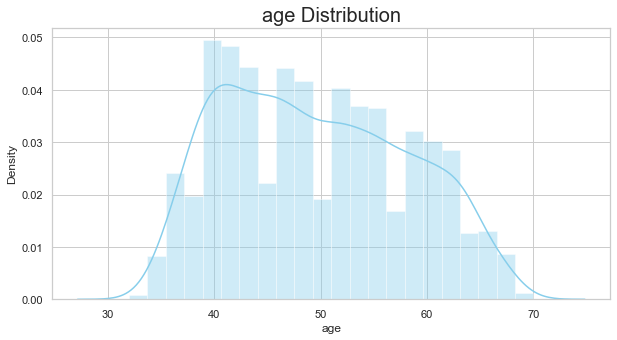

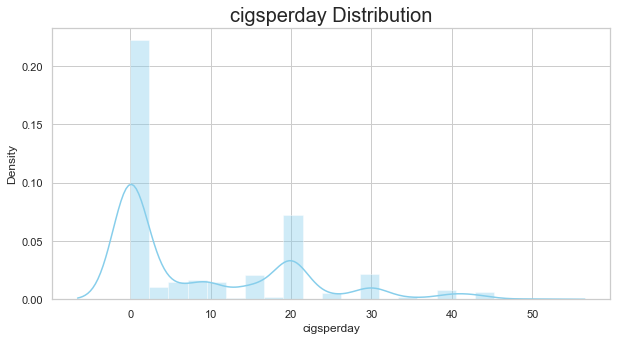

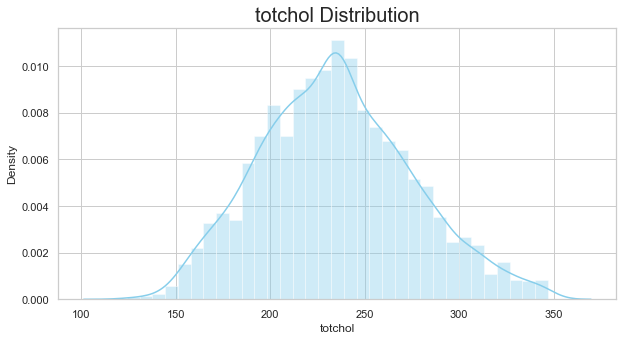

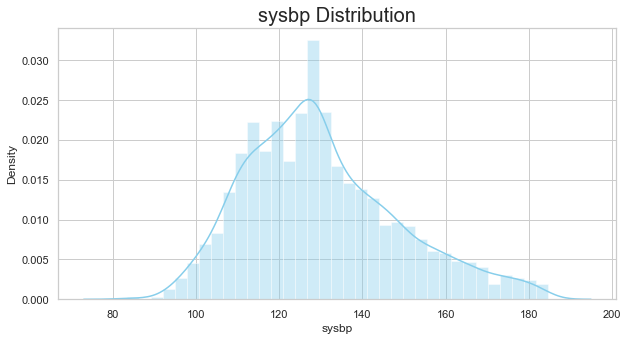

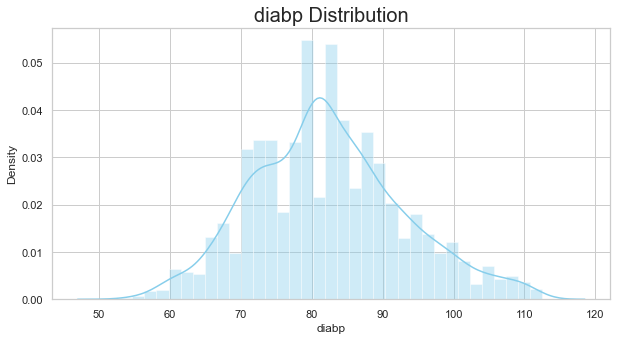

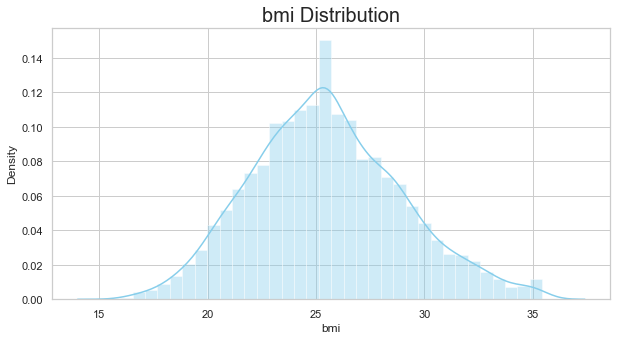

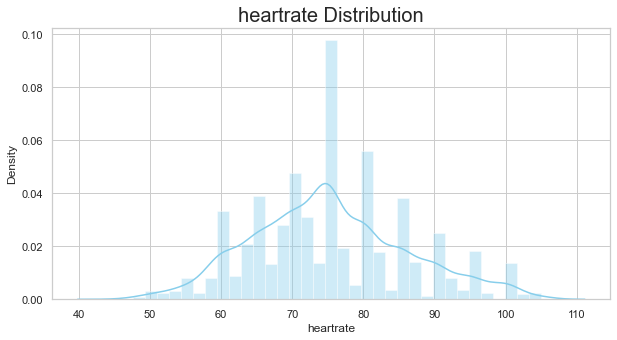

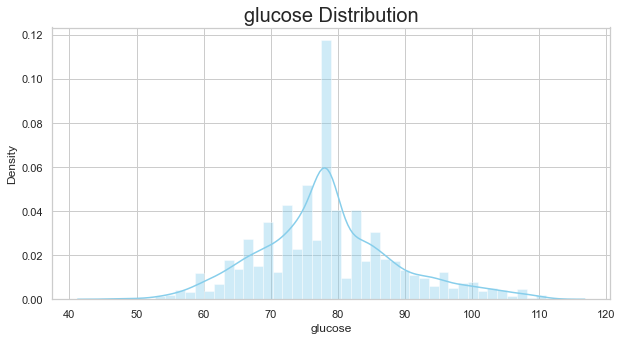

In [1048]:
numerical_variables=['age','cigsperday','totchol','sysbp','diabp','bmi','heartrate','glucose']
for feature in numerical_variables:
    plt.figure(figsize=(10,5),facecolor='w')
    sns.distplot(df[feature],color='skyblue',bins='auto')
    plt.title(f'{feature} Distribution',fontsize=20)
    plt.show()
    

#### Conclusion:
- totchol,sysbp,bmi have uniform distribution while age,cigsperday,heartrate and glucose are unevenly distributed

### 5.3) Bivarite Analysis

- Countplot of people who is smoking or not according to the gender.

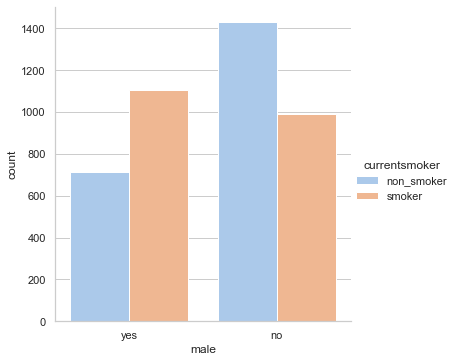

In [1049]:
sns.catplot(data=df,kind='count',x='male',hue='currentsmoker',palette='pastel')
plt.show()

#### Conclusion: Male smoke more that female

- No of people affecting with CHD on the basis of their sex

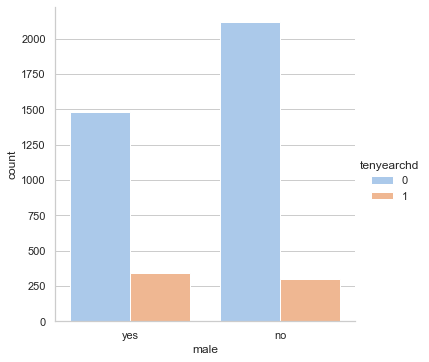

In [1050]:
sns.catplot(data=df,x='male',kind='count',hue='tenyearchd',palette='pastel')
plt.show()

#### Conclusion: Both female and male have both chances of getting CHD

<Figure size 2160x1080 with 0 Axes>

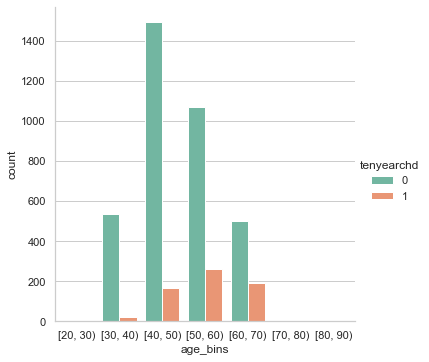

In [1051]:
df['age_bins'] = pd.cut(df['age'], bins=range(20, 100, 10), right=False)
plt.figure(figsize=(30,15))
sns.catplot(data=df,x='age_bins',hue='tenyearchd',kind='count',palette='Set2')
plt.show()

#### Conclusion:
- Chances of getting CHD are mostly among the age group 50-60.
- While age group between 30 has the lowest chances of getting CHD

### Relationship between diabp and risk of TenyearCHD

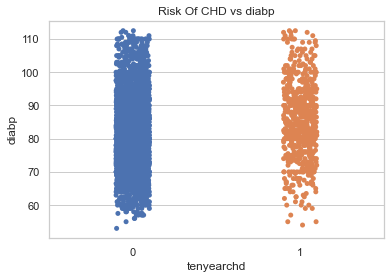

In [1052]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='tenyearchd',y='diabp',data=df)
plt.title('Risk Of CHD vs diabp')
plt.show()

### 5.6) Multivarite Analysis
- Relationship between Age,cigsPerDay and TenYearCHD

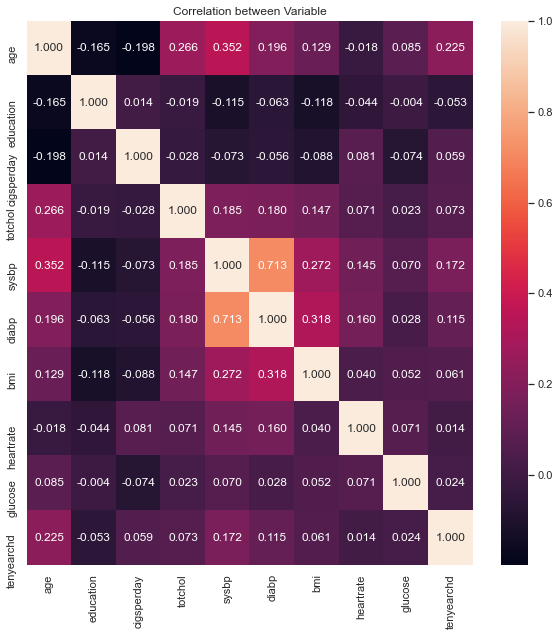

In [1053]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt='.3f')
plt.title('Correlation between Variable')
plt.show()

## 6) Feature Selection

#### Feature selection
Feature selection is the process of choosing the most important features (variables) from your dataset that are relevant to your target variable. This step helps to improve the performance of machine learning models by reducing complexity, overfitting, and computation time.

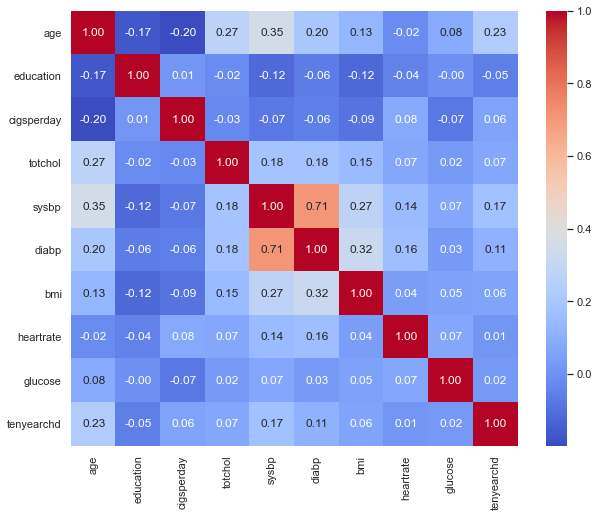

In [1054]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [1055]:
df.drop(['sysbp'],axis=1,inplace=True)
df.drop(['diabp'],axis=1,inplace=True)
df.drop(['age_bins'],axis=1,inplace=True)

## Converting back categorical variable into numerical variable for training purposes

In [1056]:
male_values = {'no': 0, 'yes': 1}
df['male'] = df['male'].map(male_values)

currentsmoker_values = {'non_smoker':0,'smoker':1}
df['currentsmoker'] = df['currentsmoker'].map(currentsmoker_values)

stroke_values = {'no_stroke':0,'stroke':1}
df['prevalentstroke'] = df['prevalentstroke'].map(stroke_values)

hype_values = {'no_hypertension':0,'hypertension':1}
df['prevalenthyp'] = df['prevalenthyp'].map(hype_values)

diabetes_values = {'no_diabetes':0,'diabetes':1}
df['diabetes'] = df['diabetes'].map(diabetes_values)
bpmeds_values = {'no bp meds':0,'bp meds':1}
df['bpmeds']=df['bpmeds'].map(bpmeds_values)


In [1057]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0,0,0,0,195.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,23.10,85.0,85.0,0


## Training the model

In [1058]:
#splitting the dataset
from sklearn.model_selection import train_test_split
df_copy=df.copy()
df_full_train,df_test=train_test_split(df_copy,test_size=0.20,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)


In [1059]:
len(df),len(df_train),len(df_test),len(df_val)

(4240, 2544, 848, 848)

In [1060]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
y_train=df_train.tenyearchd.values
y_test=df_test.tenyearchd.values
y_val=df_val.tenyearchd.values
del df_train['tenyearchd']
del df_test['tenyearchd']
del df_val['tenyearchd']

In [1061]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0,0,0,0,195.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,23.10,85.0,85.0,0


In [1062]:
numerical_columns=['age','education','cigsperday','totchol','bmi','heartrate','glucose']
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']


## Training Logistic Regression

In [1063]:
train_dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
val_dicts = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(train_dicts)
X_val=dv.transform(val_dicts)



In [1064]:
from sklearn.linear_model import LogisticRegression

regression=LogisticRegression(solver='liblinear',class_weight='balanced',random_state=1, C=1.0, max_iter=1000)
regression.fit(X_train,y_train)

y_pred=regression.predict(X_val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
accuracy_score_model=accuracy_score(y_val,y_pred)
print(f'acc:{accuracy_score_model}')
auc=roc_auc_score(y_val,y_pred)
print(f'auc:{auc}')

acc:0.6450471698113207
auc:0.653917477978674


## Tuning the Logistic Regression(K-Fold-Validation)

In [1065]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

for C in tqdm([0.001, 0.01, 0.1, 1, 5, 10]):
    kfold=KFold(n_splits=5,shuffle=True,random_state=1)
    
    score=[]
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]
        
        y_train=df_train.tenyearchd
        y_val=df_val.tenyearchd
        
        del df_train['tenyearchd']
        del df_val['tenyearchd']
        model=LogisticRegression()
        model.fit(df_train,y_train)
        y_pred=model.predict_proba(df_val)[:,1]
        auc=roc_auc_score(y_val,y_pred)
        score.append(auc)
        
        print(f"C={C} {np.mean(score):.3f} ± {np.std(score):.3f}")

        




  0%|          | 0/6 [00:00<?, ?it/s]

C=0.001 0.699 ± 0.000
C=0.001 0.686 ± 0.013
C=0.001 0.681 ± 0.013
C=0.001 0.682 ± 0.011


 17%|█▋        | 1/6 [00:00<00:03,  1.53it/s]

C=0.001 0.690 ± 0.019
C=0.01 0.699 ± 0.000
C=0.01 0.686 ± 0.013
C=0.01 0.681 ± 0.013
C=0.01 0.682 ± 0.011


 33%|███▎      | 2/6 [00:01<00:02,  1.60it/s]

C=0.01 0.690 ± 0.019
C=0.1 0.699 ± 0.000
C=0.1 0.686 ± 0.013
C=0.1 0.681 ± 0.013
C=0.1 0.682 ± 0.011


 50%|█████     | 3/6 [00:01<00:01,  1.65it/s]

C=0.1 0.690 ± 0.019
C=1 0.699 ± 0.000
C=1 0.686 ± 0.013
C=1 0.681 ± 0.013
C=1 0.682 ± 0.011


 67%|██████▋   | 4/6 [00:02<00:01,  1.69it/s]

C=1 0.690 ± 0.019
C=5 0.699 ± 0.000
C=5 0.686 ± 0.013
C=5 0.681 ± 0.013
C=5 0.682 ± 0.011


 83%|████████▎ | 5/6 [00:02<00:00,  1.72it/s]

C=5 0.690 ± 0.019
C=10 0.699 ± 0.000
C=10 0.686 ± 0.013
C=10 0.681 ± 0.013
C=10 0.682 ± 0.011


100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

C=10 0.690 ± 0.019


## Decision Tree

In [1066]:
from sklearn.tree import DecisionTreeClassifier
numerical_columns=['age','education','cigsperday','totchol','bmi','heartrate','glucose']
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']
dv=DictVectorizer(sparse=True)

train_dict=df_train[numerical_columns+categorical_columns].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

val_dict=df_val[numerical_columns+categorical_columns].to_dict(orient='records')
X_val=dv.transform(val_dict)

dt=DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred_prob=dt.predict_proba(X_val)[:,1]
y_pred = (y_pred_prob >= 0.5).astype(int)
acc = round(accuracy_score(y_val, y_pred), 5)
print(f'acc:{acc}')
auc= round(roc_auc_score(y_val, y_pred), 5)
print(f'auc:{auc}')



acc:0.77434
auc:0.59379


## Tuning Decision Tree

In [1067]:
mean_score=[]
for depth in [8,10,15,20,None]:
    for s in [1,2,5,10,15]:
        kfold=KFold(n_splits=5,random_state=1,shuffle=True)
        score=[]
        for train_idx,val_idx in kfold.split(df_full_train):
            df_train=df_full_train.iloc[train_idx]
            df_val=df_full_train.iloc[val_idx]
            y_train=df_train.tenyearchd.values
            y_val=df_val.tenyearchd.values
            
            del df_train['tenyearchd']
            del df_val['tenyearchd']
            
            dv=DictVectorizer(sparse=False)
            X_train=dv.fit_transform(df_train.to_dict(orient='records'))
            X_val=dv.transform(df_val.to_dict(orient='records'))
            
            dt=DecisionTreeClassifier(max_depth=depth,min_samples_leaf=s,random_state=1)
            dt.fit(X_train,y_train)
            y_pred=dt.predict_proba(df_val)[:,1]
            auc=roc_auc_score(y_val,y_pred)
            score.append(auc)
            mean_score.append((depth,s ,np.mean(score)))
        


In [1068]:
columns=['max_depth','min_samples_leaf','auc']
df_scores=pd.DataFrame(mean_score,columns=columns)

In [1069]:
df_scores=df_scores.sort_values(by=['auc'],ascending=False)
df_scores

,max_depth,min_samples_leaf,auc
1,8.0,1,0.500442
6,8.0,2,0.500442
26,10.0,1,0.500442
2,8.0,1,0.500294
7,8.0,2,0.500294
...,...,...,...
107,NaN,2,0.499706
106,NaN,2,0.499558
56,15.0,2,0.499558
31,10.0,2,0.499558


## Random forest

In [1070]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
numerical_columns=['age','education','cigsperday','totchol','bmi','heartrate','glucose']
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']
dv=DictVectorizer(sparse=False)

train_dict=df_train[numerical_columns+categorical_columns].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)
val_dict=df_val[numerical_columns+categorical_columns].to_dict(orient='records')
X_val=dv.transform(val_dict)
rf=RandomForestClassifier(n_estimators=5,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_val)
acc=accuracy_score(y_val,y_pred)
print(f'acc:{acc}')
auc=roc_auc_score(y_val,y_pred)
print(f'auc:{auc}')

acc:0.8112094395280236
auc:0.5133586148909518


## Random Forest-Tuning

In [1071]:
mean_score=[]
for depth in [8,10,15,20,None]:
     for s in [1,2,5,10,15]:
         for n in [5,10,15,20,30,60,100,150,200]:
             kfold=KFold(n_splits=5,shuffle=True,random_state=1)
             scores=[]
             for train_idx,val_idx in kfold.split(df_full_train):
                 df_train=df_full_train.iloc[train_idx]
                 df_val=df_full_train.iloc[val_idx]
                 
                 df_val=df_full_train.iloc[val_idx]
                 y_train=df_train.tenyearchd.values
                 y_val=df_val.tenyearchd.values
            
                 del df_train['tenyearchd']
                 del df_val['tenyearchd']
                 dv=DictVectorizer(sparse=False)
                 X_train=dv.fit_transform(df_train.to_dict(orient='records'))
                 X_val=dv.transform(df_val.to_dict(orient='records'))
                 rf=RandomForestClassifier(n_estimators=n,max_depth=depth,min_samples_leaf=s,random_state=1)
                 rf.fit(X_train,y_train)
                 
                 y_pred=rf.predict(X_val)
                 auc=roc_auc_score(y_val,y_pred)
                 print(f'auc:{auc}')
                 mean_score.append((depth,s,n,np.mean(score)))
                #  acc=accuracy_score(y_val,y_pred)
                #  print(f'acc:{acc}')

auc:0.5178414913700108
auc:0.5194893523875043
auc:0.5004873294346979
auc:0.5221476125980046
auc:0.524503663537931
auc:0.5150771979503775
auc:0.502665811939085
auc:0.5011208576998051
auc:0.5134583468457298
auc:0.5180688779449869
auc:0.5159452535059331
auc:0.5035492041652335
auc:0.49736842105263157
auc:0.5199252208084546
auc:0.506434785592944
auc:0.5185494201725998
auc:0.5088573751524438
auc:0.4956140350877193
auc:0.5160050361496348
auc:0.5023508416699556
auc:0.5273901024811218
auc:0.5123909440570374
auc:0.5066276803118909
auc:0.5056179775280899
auc:0.508167887845977
auc:0.5273901024811218
auc:0.5088495575221239
auc:0.5028752436647174
auc:0.5
auc:0.5099009900990099
auc:0.5097087378640777
auc:0.5088495575221239
auc:0.5037524366471735
auc:0.5
auc:0.504950495049505
auc:0.5097087378640777
auc:0.5132743362831859
auc:0.5046296296296297
auc:0.5
auc:0.504950495049505
auc:0.5097087378640777
auc:0.5132743362831859
auc:0.5037524366471735
auc:0.5
auc:0.504950495049505
auc:0.500514091154261
auc:0.516

## Xgboost

In [1072]:

!pip install xgboost

In [1073]:
import xgboost as xgb

In [1074]:
numerical_columns=['age','education','cigsperday','totchol','bmi','heartrate','glucose']
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
for train_idx,val_idx in kfold.split(df_full_train):
    df_train=df_full_train.iloc[train_idx]
    df_val=df_full_train.iloc[val_idx]
    y_train=df_train.tenyearchd.values
    y_val=df_val.tenyearchd.values
                
    del df_train['tenyearchd']
    del df_val['tenyearchd']
                
    dv=DictVectorizer(sparse=False)
    X_train=dv.fit_transform(df_train.to_dict(orient='records'))
    X_val=dv.transform(df_val.to_dict(orient='records'))
    
    dtrain=xgb.DMatrix(X_train,label=y_train)
    dval=xgb.DMatrix(X_val,label=y_val)
    xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': -1,
    'seed': 1,
    }
    
    xgb_model=xgb.train(xgb_params,dtrain)
    y_pred=xgb_model.predict(dval)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    auc=roc_auc_score(y_val,y_pred_binary)
    acc=accuracy_score(y_val,y_pred_binary)
    print(f'auc:{auc}')
    print(f'acc:{acc}')

auc:0.5310224514563107
acc:0.8468335787923417
auc:0.5256730979705432
acc:0.8350515463917526
auc:0.5207602339181286
acc:0.8377581120943953
auc:0.5204498197287346
acc:0.8628318584070797
auc:0.5242548518283371
acc:0.8436578171091446


## Xgboost Tuning

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid={
    'eta':[0.01,0.1,0.2,0.3],
    'max_depth':[3,5,7],
    'min_child_weight':[1,3,5],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.3,0.6,0.9],
}
numerical_columns=['age','education','cigsperday','totchol','bmi','heartrate','glucose']
categorical_columns=['male','currentsmoker','bpmeds','prevalentstroke','prevalenthyp','diabetes']

kfold=KFold(n_splits=5,shuffle=True,random_state=1)
best_auc = 0
best_params = None
for param in ParameterGrid(param_grid):
    fold_aucs = []
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]
        
        y_train=df_train.tenyearchd.values
        y_val=df_val.tenyearchd.values
        
        del df_train['tenyearchd']
    
        del df_val['tenyearchd']
        
        dv=DictVectorizer(sparse=False)
        X_train=dv.fit_transform(df_train.to_dict(orient='records'))
        X_val=dv.transform(df_val.to_dict(orient='records'))
        
        dtrain=xgb.DMatrix(X_train,label=y_train)
        dval=xgb.DMatrix(X_val,label=y_val)
        
        model=xgb.train(param,dtrain,num_boost_round=100)
        
        y_pred=model.predict(dval)
        auc=roc_auc_score(y_val,y_pred)
        fold_aucs.append(auc)

In [1076]:
avg_auc=sum(fold_aucs)/len(fold_aucs)
print(f"Params: {param}, AUC: {avg_auc}")

Params: {'colsample_bytree': 0.9, 'eta': 0.3, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 1.0}, AUC: 0.6296921351155738


In [1083]:
if avg_auc>best_auc:
    best_auc=avg_auc
    best_params=param
print("Best Parameters:", best_params)
print("Best AUC:", best_auc)    

Best Parameters: {'colsample_bytree': 0.9, 'eta': 0.3, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 1.0}
Best AUC: 0.6296921351155738
